In [1]:
import numpy as np
from multiplicative_weights_sim import generate_agents, sim
from generate_opinions import *
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
num_agents = 1000
# opinions = bimodal_opinions(
#     num_agents=num_agents,
#     mean1=-0.5,
#     mean2=0.5,
#     std_dev1=0.1,
#     std_dev2=0.1,
#     lower_bound=-1,
#     upper_bound=1,
#     proportion_first_mode=0.5 )

# opinions = normal_opinions(
#     num_agents=200,
#     mean=0,
#     std_dev=0.25,
#     lower_bound=-1,
#     upper_bound=1
# )

# opinions = trimodal_opinions(mean1=-0.5, mean2=0, mean3=0.5, std_dev=0.1, num_agents=1000, lower_bound=-1, upper_bound=1)


# steps = [(-0.6, 250), (0, 500), (0.6, 250)]  # Mean opinion and size for each step
# num_agents = 1000
# lower_bound = -1
# upper_bound = 1

# opinions = step_opinions(steps, num_agents, lower_bound, upper_bound)

# start = 0  # Starting point of the random walk in the middle of the opinion space
# num_agents = 1000
# step_size = 0.1  # Determines how much each step in the random walk can change

# opinions = random_walk_opinions(start, num_agents, step_size)

saved_opinions = pd.read_csv('constants/opinions.csv', index_col=0)

opinions = saved_opinions['0'].to_list()

all_agents = []

for percent_low in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    num_extra_low = int(num_agents*percent_low)
    num_same = int(num_agents*(1-percent_low)/2)
    num_high = num_agents - num_extra_low - num_same

    weights = []

    for i in range(0, num_extra_low):
        weights.append(np.array([8, 1, 1]))

    for i in range(0, num_same):
        weights.append(np.array([1, 1, 1]))

    for i in range(0, num_high):
        weights.append(np.array([1, 1, 8]))

    random.shuffle(weights)
    print(len(weights))

    agents = generate_agents(opinions, weights)
    all_agents.append((percent_low, agents))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [12]:
opinions = [agent.opinions[0] for agent in agents.values()]
len(opinions)

1000

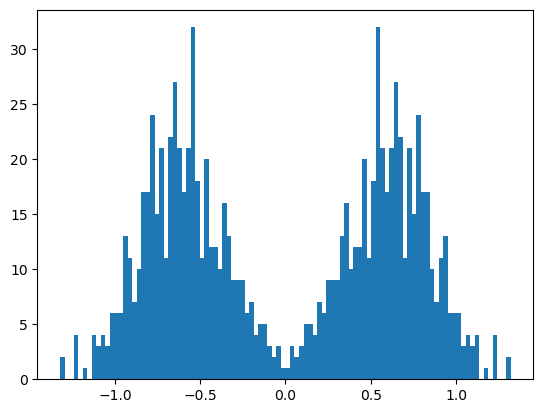

In [13]:
import matplotlib.pyplot as plt
plt.hist(opinions, bins=100)
plt.show()

In [4]:
# all_agents_post_sim = []
# for agents in all_agents:
#     print(f"simulating low preference percent {agents[0]}")
#     all_agents_post_sim.append((agents[0], sim(agents[1], 1000, 0.1)))
import pickle
with open('low_preference_data.pkl', 'rb') as f:
    all_agents_post_loaded = pickle.load(f)

In [6]:
for prob, agents in all_agents_post_loaded:
    with open(f'low_preference_data_{prob}.pkl', 'wb') as f:
        pickle.dump(agents, f)